In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
JD = pd.concat([pd.read_json('all_JD_1.json'), pd.read_json('all_JD_2.json'), 
                pd.read_json('all_JD_3.json'), pd.read_json('all_JD_4.json')],
               ignore_index=True)

In [3]:
JD.shape

(9679, 63)

In [4]:
JD.rename(columns=dict(zip(JD.columns.tolist(), map(str, JD.columns.tolist()))), inplace=True)

pro_keys = [
    'sql', 'nosql', 'mysql', 'psql', 'mdb', 'pig', 'mahout', 'xls', 'rm',
    'c', 'cpp', 'java', 'js', 'scala', 'ruby', 'python', 'matlab', 'r', 'sas', 'spss',
    'tf', 'torch', 'theano', 'caffe', 'knm',
    'spark', 'hadoop', 'mapreduce', 'mlb', 'hv',
    'tab', 'd3', 'spf',
    'linux', 'unix', 'gnu', 'git'
]
        
pro = [
    'SQL', 'NoSQL', 'MySQL', 'PostgreSQL', 'MongoDB', 'Pig', 'Mahout', 'Excel', 'RapidMiner',
    'C', 'C++', 'Java', 'JavaScript', 'Scala', 'Ruby', 'Python', 'MATLAB', 'R', 'SAS', 'SPSS',
    'TensorFlow', 'Torch', 'Theano', 'Caffe', 'KNIME',
    'Spark', 'Hadoop','MapReduce', 'MLlib', 'Hive',
    'Tableau', 'D3.js', 'Spotfire',
    'Linux', 'Unix', 'GNU', 'Git'
]

iden_keys = ['bs', 'ms', 'phd']
iden = ['Bachelor', 'Master', 'PhD']

bw_keys = [
    'ml', 'dl', 'rl', 'sl', 'ul',
    'sml', 'nn', 'ai', 'dm',
    'abt', 'pp', 'dv', 'cv',
    'dt', 'rs',
    'nlp', 'pca', 'svm'
]
        
bw = [
    'Machine Learning', 'Deep Learning', 'Reinforcement Learning', 'Supervised Learning', 'Unsupervised Learning',
    'Semisupervised Learning', 'Neural Network', 'Artificial Intelligence', 'Data Mining',
    'A/B Testing', 'Parallel Programming', 'Data Visualization', 'Computer Vision',
    'Decision Tree', 'Recommendation System',
    'NLP', 'PCA', 'SVM',
]

print map(len,[pro_keys, bw_keys, iden_keys, pro, bw, iden])
key_map = dict(zip(pro_keys + bw_keys + iden_keys, pro + bw + iden))

JD.rename(columns=dict(zip(pro_keys + bw_keys + iden_keys, pro + bw + iden)), inplace=True)
JD.rename(columns={'loc':'Location', 'company':'Company','title': 'Title'}, inplace=True)

[37, 18, 3, 37, 18, 3]


In [5]:
# To ensure non-duplication
JD.drop_duplicates(subset=(pro + bw + iden + ['Location', 'Company', 'Title']), keep='first',inplace=True)
JD.shape

(9679, 63)

In [6]:
pro_pop = JD[pro].mean().sort_values(0, ascending=False).index.tolist()
bw_pop = JD[bw].mean().sort_values(0, ascending=False).index.tolist()
loc_pop = JD.Location.value_counts().index.tolist()
loc_geo = [
    'Seattle',
    'San Francisco',
    'San Jose',
    'Los Angeles',
    'Colorado',
    
    'Texas',
    'Chicago',
    'Boston',
    'New York',
    'Philadelphia',
    
    'New Jersey',
    'DC',
    'North Carolina',
    'Georgia'
]

In [7]:
# hotfix dirty data: this company in Colorado doesn't specifiy any C in their JD

fix_c = JD[(JD.Location == 'Colorado') & (JD.C == 1) & (JD.Company=='Ball Aerospace')]['url'].index
fix_c
JD.ix[fix_c, 'C'] = 0

print JD[(JD.Company == 'Ball Aerospace')&(JD.Location =='Colorado')].shape[0]
print JD[JD.Location =='Colorado'].shape[0]

len(fix_c)

137
380


137

In [8]:
loc_pop

[u'New York',
 u'DC',
 u'San Jose',
 u'Boston',
 u'San Francisco',
 u'New Jersey',
 u'Seattle',
 u'Texas',
 u'Philadelphia',
 u'Los Angeles',
 u'Chicago',
 u'North Carolina',
 u'Colorado',
 u'Georgia']

In [9]:
key_map

{'abt': 'A/B Testing',
 'ai': 'Artificial Intelligence',
 'bs': 'Bachelor',
 'c': 'C',
 'caffe': 'Caffe',
 'cpp': 'C++',
 'cv': 'Computer Vision',
 'd3': 'D3.js',
 'dl': 'Deep Learning',
 'dm': 'Data Mining',
 'dt': 'Decision Tree',
 'dv': 'Data Visualization',
 'git': 'Git',
 'gnu': 'GNU',
 'hadoop': 'Hadoop',
 'hv': 'Hive',
 'java': 'Java',
 'js': 'JavaScript',
 'knm': 'KNIME',
 'linux': 'Linux',
 'mahout': 'Mahout',
 'mapreduce': 'MapReduce',
 'matlab': 'MATLAB',
 'mdb': 'MongoDB',
 'ml': 'Machine Learning',
 'mlb': 'MLlib',
 'ms': 'Master',
 'mysql': 'MySQL',
 'nlp': 'NLP',
 'nn': 'Neural Network',
 'nosql': 'NoSQL',
 'pca': 'PCA',
 'phd': 'PhD',
 'pig': 'Pig',
 'pp': 'Parallel Programming',
 'psql': 'PostgreSQL',
 'python': 'Python',
 'r': 'R',
 'rl': 'Reinforcement Learning',
 'rm': 'RapidMiner',
 'rs': 'Recommendation System',
 'ruby': 'Ruby',
 'sas': 'SAS',
 'scala': 'Scala',
 'sl': 'Supervised Learning',
 'sml': 'Semisupervised Learning',
 'spark': 'Spark',
 'spf': 'Spotfire',

In [10]:
JD[pro].mean().sort_values(0, ascending=False)

R             0.288150
Python        0.189069
Excel         0.149706
SQL           0.137514
Java          0.107552
SAS           0.106726
C             0.103730
Hadoop        0.088439
C++           0.074181
JavaScript    0.072115
MATLAB        0.057237
Linux         0.056721
Spark         0.055584
Hive          0.043496
Unix          0.039570
Tableau       0.034921
SPSS          0.034094
NoSQL         0.031821
Scala         0.030995
Pig           0.025519
MapReduce     0.024073
Ruby          0.021800
MySQL         0.015911
D3.js         0.013431
MongoDB       0.010435
Git           0.010125
PostgreSQL    0.008472
Mahout        0.005786
TensorFlow    0.005579
Spotfire      0.004959
Theano        0.004339
Torch         0.003306
Caffe         0.002996
MLlib         0.001860
KNIME         0.001756
RapidMiner    0.001446
GNU           0.000827
dtype: float64

In [11]:
JD[bw].mean().sort_values(0, ascending=False)

Machine Learning           0.171195
Data Mining                0.083376
Data Visualization         0.047009
NLP                        0.036884
Deep Learning              0.020870
Artificial Intelligence    0.014878
Computer Vision            0.014361
Decision Tree              0.011778
SVM                        0.010435
A/B Testing                0.009815
Recommendation System      0.004029
Unsupervised Learning      0.002996
Neural Network             0.002170
Reinforcement Learning     0.001963
PCA                        0.001860
Parallel Programming       0.001240
Supervised Learning        0.000930
Semisupervised Learning    0.000207
dtype: float64

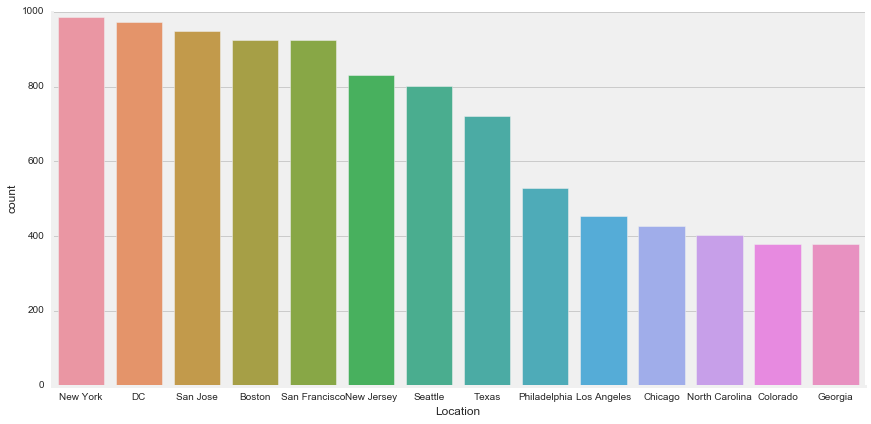

In [12]:
sns.factorplot('Location',data=JD,kind='count',size=6,aspect=2,order=loc_pop)

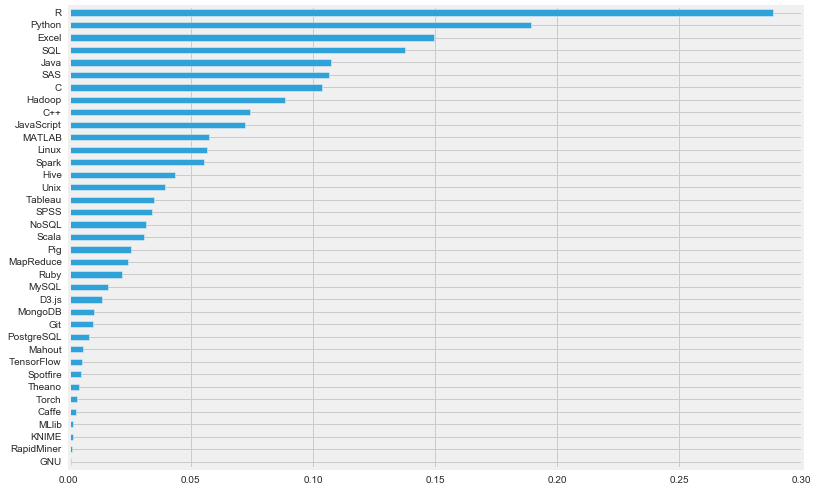

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
JD[pro].mean().sort_values(0, ascending=True).plot(kind='barh',ax=ax)

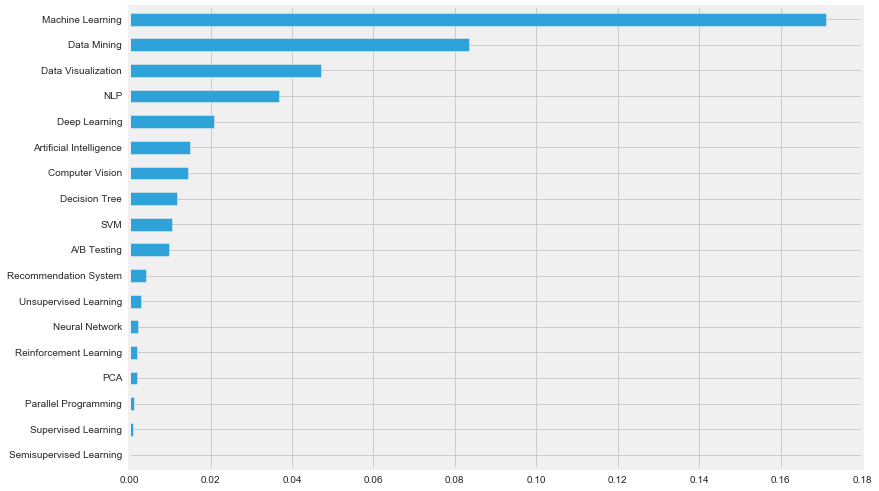

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
JD[bw].mean().sort_values(0, ascending=True).plot(kind='barh',ax=ax,)

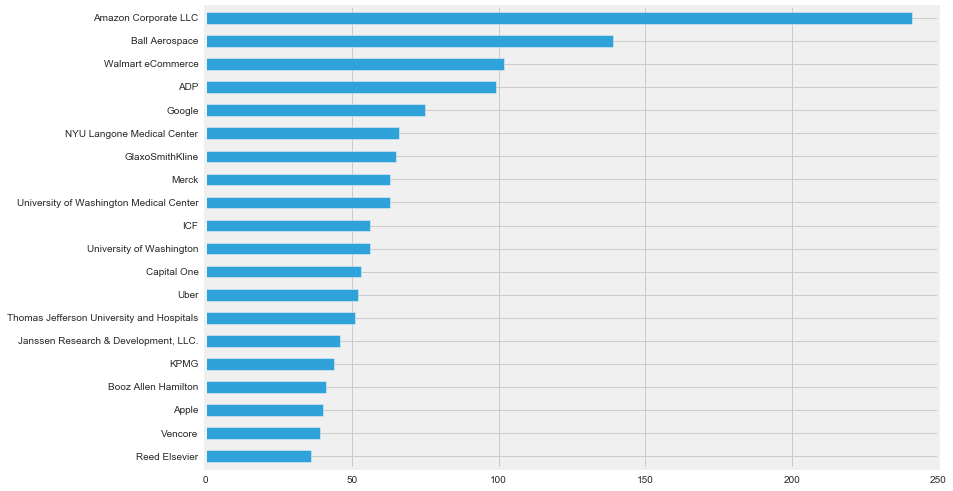

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
JD.Company.value_counts().head(20).sort_values(0, ascending=True).plot(kind='barh',ax=ax,)

In [16]:
JD.Company.value_counts().head(20)

Amazon Corporate LLC                         241
Ball Aerospace                               139
Walmart eCommerce                            102
ADP                                           99
Google                                        75
NYU Langone Medical Center                    66
GlaxoSmithKline                               65
University of Washington Medical Center       63
Merck                                         63
ICF                                           56
University of Washington                      56
Capital One                                   53
Uber                                          52
Thomas Jefferson University and Hospitals     51
Janssen Research & Development, LLC.          46
KPMG                                          44
Booz Allen Hamilton                           41
Apple                                         40
Vencore                                       39
Reed Elsevier                                 36
Name: Company, dtype

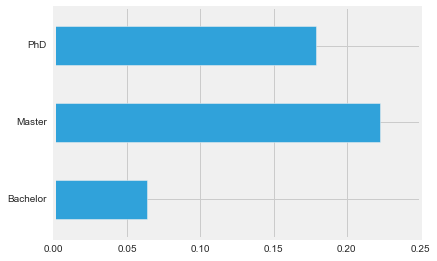

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7 / 2, 8.27 / 2)
JD[iden].mean().plot('barh',ax=ax)

In [18]:
JD_freq = JD.groupby('Location').mean()

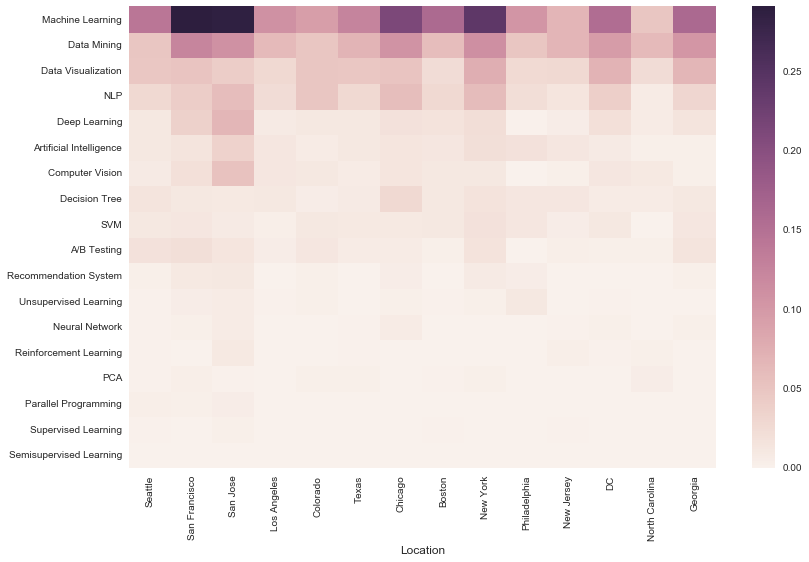

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(JD_freq.ix[loc_geo, bw_pop].T,ax=ax)

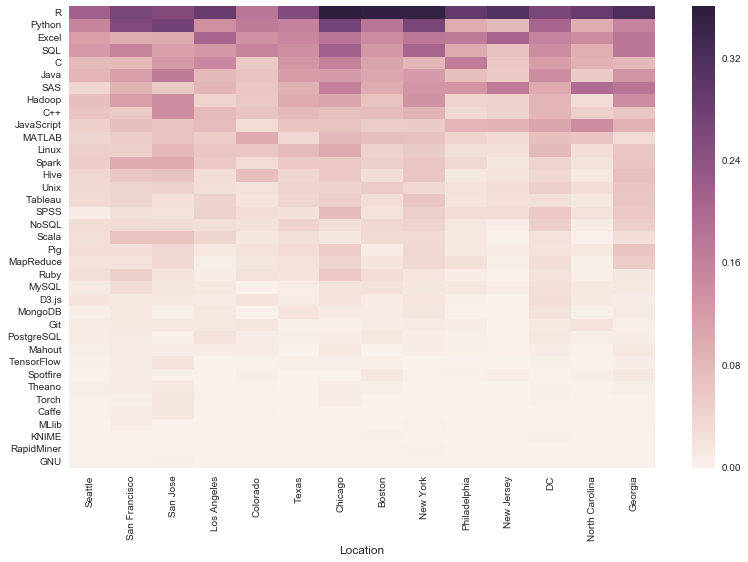

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(JD_freq.ix[loc_geo, pro_pop].T,ax=ax)

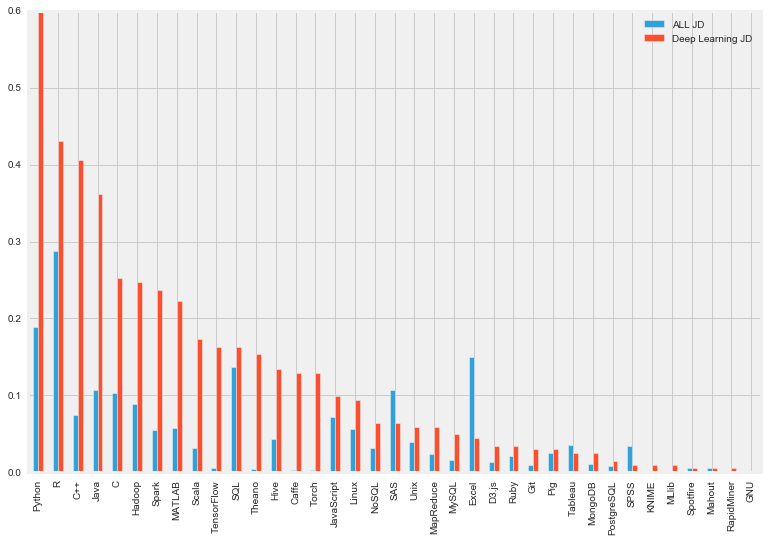

In [21]:
cpr = pd.concat([JD[pro].mean(), JD[JD['Deep Learning'] == 1][pro].mean()], axis=1)
cpr.columns = ['ALL JD', 'Deep Learning JD']
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
cpr.sort_values(by='Deep Learning JD', ascending=False).plot(kind = 'bar',ax=ax)

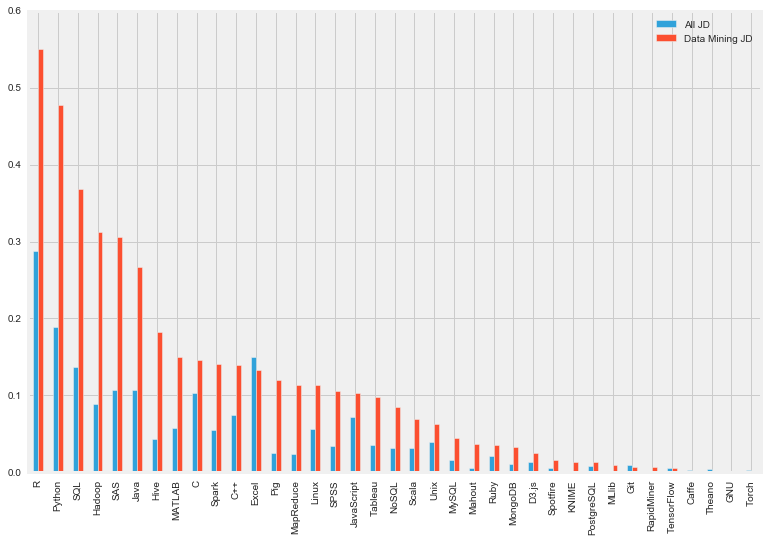

In [22]:
cpr = pd.concat([JD[pro].mean(), JD[JD['Data Mining'] == 1][pro].mean()], axis=1)
cpr.columns = ['All JD', 'Data Mining JD']

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
cpr.sort_values(by='Data Mining JD', ascending=False).plot(kind = 'bar',ax=ax)

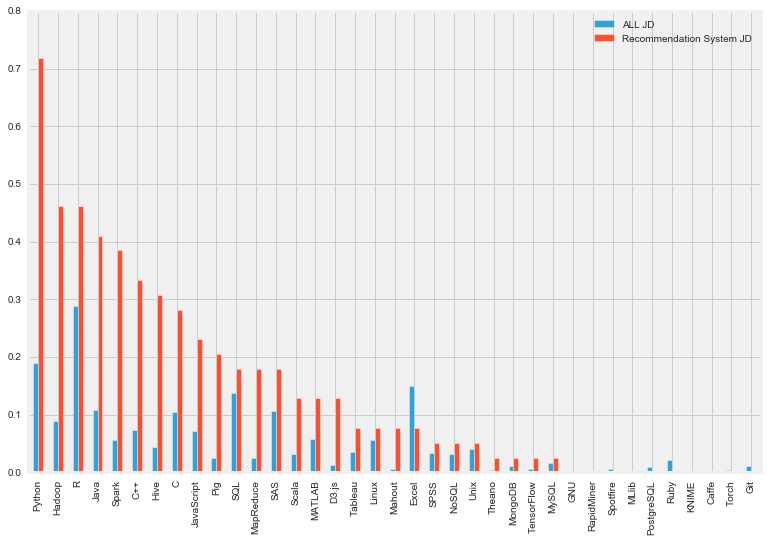

In [23]:
cpr = pd.concat([JD[pro].mean(), JD[JD['Recommendation System'] == 1][pro].mean()], axis=1)
cpr.columns = ['ALL JD', 'Recommendation System JD']

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
cpr.sort_values(by='Recommendation System JD', ascending=False).plot(kind = 'bar',ax=ax)

In [24]:
gp_loc = JD.groupby('Location')

def count_top_n(df, col, n):
    col_count = df[col].value_counts()
    
    if n > col_count.size:
        return np.nan
    else:
        return col_count.index[n - 1]

top_recruiter = pd.concat([gp_loc.apply(lambda df: count_top_n(df, 'Company', 1)),
                           gp_loc.apply(lambda df: count_top_n(df, 'Company', 2)),
                           gp_loc.apply(lambda df: count_top_n(df, 'Company', 3)),
                           gp_loc.apply(lambda df: count_top_n(df, 'Company', 4)),
                           gp_loc.apply(lambda df: count_top_n(df, 'Company', 5)),], axis=1).reset_index()

top_recruiter.columns = ['Location', 'Top_1', 'Top_2', 'Top_3', 'Top_4', 'Top_5']
top_recruiter

,Location,Top_1,Top_2,Top_3,Top_4,Top_5
0,Boston,Massachusetts General Hospital(MGH),Takeda Pharmaceuticals,Pfizer Inc.,NIBR,Amazon Corporate LLC
1,Chicago,Civis Analytics,University of Chicago,Northwestern University,Allstate Insurance,Tempus
2,Colorado,Ball Aerospace,University of Colorado,National Renewable Energy Laboratory,National Ecological Observatory Network Inc,xentity corporation
3,DC,ICF,Booz Allen Hamilton,Capital One,Leidos,Vencore
4,Georgia,ADP,Georgia Tech Research Institute,Equifax,Oak Ridge Associated Universities,Scientific Research Corporation
5,Los Angeles,"Beckman Coulter, Inc.",UCLA Health,The Aerospace Corporation,City Of Hope,University of Southern California
6,New Jersey,ADP,Rutgers University,Celgene Corporation,Merck,Celgene
7,New York,NYU Langone Medical Center,Mount Sinai Health System,Weill Cornell Medical College,Selby Jennings,Columbia University
8,North Carolina,Bank of America,Duke University and Duke University Health System,Oak Ridge Associated Universities,RJ Reynolds Tobacco Co,Syngenta
9,Philadelphia,Thomas Jefferson University and Hospitals,GlaxoSmithKline,"Janssen Research & Development, LLC.",Merck,Reed Elsevier


In [25]:
gp_loc_nlp = JD[JD['Deep Learning'] == 1].groupby('Location')

top_dl_recruiter = pd.concat([gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 1)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 2)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 3))], axis=1).reset_index()

top_dl_recruiter.columns = ['Location', 'Top_1', 'Top_2', 'Top_3']
top_dl_recruiter

,Location,Top_1,Top_2,Top_3
0,Boston,UTC Aerospace Systems,"Neurable, INC",NUANCE COMMUNICATIONS
1,Chicago,Civis Analytics,CCC Information Services Inc.,Jobspring Partners
2,Colorado,Galvanize,ICR Inc,HomeAdvisor
3,DC,Leidos,In-Q-Tel,Fractal Industries
4,Georgia,CareerBuilder Careers,CareerBuilder,Vesta Corporation
5,Los Angeles,The Walt Disney Studios,Datalogic,Oben
6,New Jersey,Merck,Bartech Group,"OUTSOURCE Consulting Services, Inc."
7,New York,Clarifai,AIG,Yahoo! Inc.
8,North Carolina,Duke University,Intellisoft Technologies,Teledyne Scientific & Imaging
9,Philadelphia,TE Connectivity,NaN,NaN


In [26]:
gp_loc_nlp = JD[JD['TensorFlow'] == 1].groupby('Location')

top_tf_recruiter = pd.concat([gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 1)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 2)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 3))], axis=1).reset_index()

top_tf_recruiter.columns = ['Location', 'Top_1', 'Top_2', 'Top_3']
top_tf_recruiter

,Location,Top_1,Top_2,Top_3
0,Boston,Partners HealthCare(PHS),Partners HealthCare,Huawei
1,Chicago,Civis Analytics,NaN,NaN
2,Colorado,ICR Inc,NaN,NaN
3,DC,Capital One,Booz Allen Hamilton,Proofpoint
4,Georgia,CareerBuilder Careers,Turner,Intuitive Surgical
5,New York,Google,NaN,NaN
6,North Carolina,Intellisoft Technologies,NaN,NaN
7,Philadelphia,Optymyze,NaN,NaN
8,San Francisco,The Climate Corporation,MsgAI,HIRECLOUT
9,San Jose,Google,Oracle,Intel


In [27]:
gp_loc_nlp = JD[JD['Theano'] == 1].groupby('Location')

top_thn_recruiter = pd.concat([gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 1)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 2)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 3))], axis=1).reset_index()

top_thn_recruiter.columns = ['Location', 'Top_1', 'Top_2', 'Top_3']
top_thn_recruiter

,Location,Top_1,Top_2,Top_3
0,Boston,Harvard Resource,Partners HealthCare(PHS),Partners HealthCare
1,Chicago,Civis Analytics,NaN,NaN
2,Colorado,ICR Inc,NaN,NaN
3,DC,Capital One,Leidos,Berico Technologies
4,Georgia,CareerBuilder Careers,Intuitive Surgical,NaN
5,Los Angeles,Oben,NaN,NaN
6,North Carolina,Intellisoft Technologies,NaN,NaN
7,San Francisco,The Climate Corporation,HIRECLOUT,drawbridge
8,San Jose,TERADEEP INC.,BMW of North America LLC.,Bosch
9,Seattle,Zillow,"zulily, llc",Vulcan Inc.


In [28]:
gp_loc_nlp = JD[JD['Torch'] == 1].groupby('Location')

top_tch_recruiter = pd.concat([gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 1)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 2)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 3))], axis=1).reset_index()

top_tch_recruiter.columns = ['Location', 'Top_1', 'Top_2', 'Top_3']
top_tch_recruiter

,Location,Top_1,Top_2,Top_3
0,Boston,Huawei,Harvard Resource,NaN
1,Chicago,Civis Analytics,NaN,NaN
2,DC,Berico Technologies,Capital One,Leidos
3,Georgia,Intuitive Surgical,NaN,NaN
4,Los Angeles,UCLA Health,NaN,NaN
5,San Francisco,"GenapSys, Inc.",L'Oreal USA,HIRECLOUT
6,San Jose,TERADEEP INC.,Intel,Bosch
7,Seattle,Zillow,Vulcan Inc.,Huawei


In [29]:
gp_loc_nlp = JD[JD['Caffe'] == 1].groupby('Location')

top_cf_recruiter = pd.concat([gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 1)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 2)),
                           gp_loc_nlp.apply(lambda df: count_top_n(df, 'Company', 3))], axis=1).reset_index()

top_cf_recruiter.columns = ['Location', 'Top_1', 'Top_2', 'Top_3']
top_cf_recruiter

,Location,Top_1,Top_2,Top_3
0,Chicago,Motorola Solutions,NaN,NaN
1,Colorado,ICR Inc,NaN,NaN
2,DC,Leidos,NaN,NaN
3,Georgia,Intuitive Surgical,NaN,NaN
4,San Francisco,Yahoo! Inc.,The Climate Corporation,MsgAI
5,San Jose,TERADEEP INC.,Bosch,Sikka Software
6,Seattle,Zillow,Vulcan Inc.,NaN
7,Texas,General Motors,NaN,NaN


In [30]:
corr = JD[pro_pop + bw_pop + iden].corr()

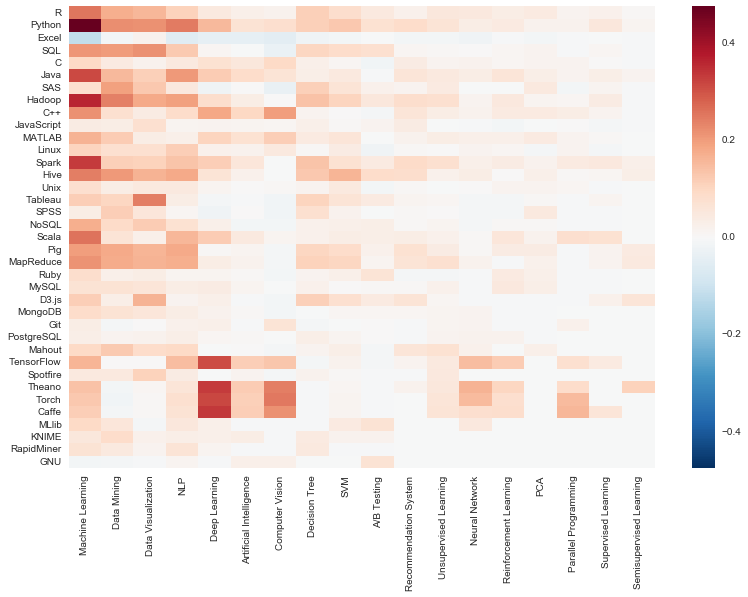

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(corr.ix[pro_pop, bw_pop],ax=ax)

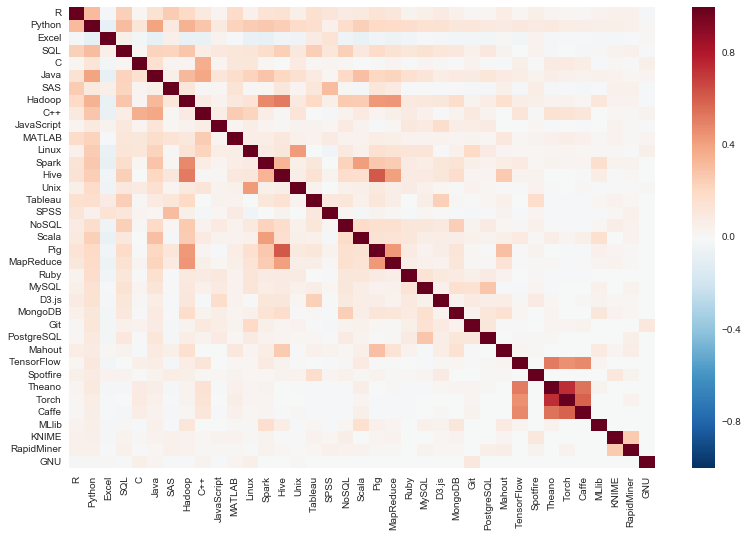

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(corr.ix[pro_pop, pro_pop],ax=ax)

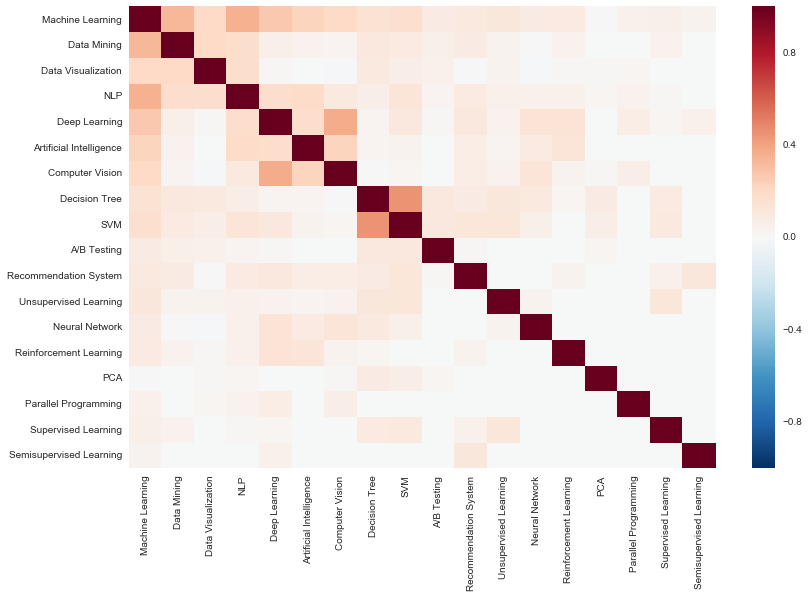

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(corr.ix[bw_pop, bw_pop],ax=ax)

In [34]:
# fetch JD: Huawei, KPMG
cond = JD[(JD.Company == 'KPMG') & (JD.NLP == 1)]
print cond.shape[0]
for c, s, u in zip(cond['Location'], cond['NLP'], cond['url']):
    print c, s, u

29
New York 1 http://www.indeed.com/rc/clk?jk=4302f67e6865181b&fccid=2dd390c3a48a7ed0
New York 1 http://www.indeed.com/rc/clk?jk=8443d7ba675e111f&fccid=2dd390c3a48a7ed0
New York 1 http://www.indeed.com/rc/clk?jk=a711cd14c9c9b336&fccid=2dd390c3a48a7ed0
New York 1 http://www.indeed.com/rc/clk?jk=fdf621504318976d&fccid=2dd390c3a48a7ed0
New York 1 http://www.indeed.com/rc/clk?jk=ad6cac7cd99c095b&fccid=2dd390c3a48a7ed0
Seattle 1 http://www.indeed.com/rc/clk?jk=bf3fabddf0beac3d&fccid=2dd390c3a48a7ed0
DC 1 http://www.indeed.com/rc/clk?jk=12320fb4639cedc3&fccid=2dd390c3a48a7ed0
DC 1 http://www.indeed.com/rc/clk?jk=29ebd395ee097483&fccid=2dd390c3a48a7ed0
DC 1 http://www.indeed.com/rc/clk?jk=32cc5be17dbb219d&fccid=2dd390c3a48a7ed0
DC 1 http://www.indeed.com/rc/clk?jk=af7f397d86508bc8&fccid=2dd390c3a48a7ed0
Chicago 1 http://www.indeed.com/rc/clk?jk=470c8353e5469a5b&fccid=2dd390c3a48a7ed0
Chicago 1 http://www.indeed.com/rc/clk?jk=6ebc52bfd98b9c19&fccid=2dd390c3a48a7ed0
Chicago 1 http://www.indeed.

In [35]:
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
from mpl_toolkits.mplot3d import Axes3D

In [36]:
X = JD.loc[:, pro + bw + ['Bachelor', 'Master', 'PhD']]
X = (X - X.mean()) / X.std()
print X.mean().mean(), X.std().mean()
print X.shape
X.columns

1.38103885189e-16 1.0
(9679, 58)


Index([u'SQL', u'NoSQL', u'MySQL', u'PostgreSQL', u'MongoDB', u'Pig',
       u'Mahout', u'Excel', u'RapidMiner', u'C', u'C++', u'Java',
       u'JavaScript', u'Scala', u'Ruby', u'Python', u'MATLAB', u'R', u'SAS',
       u'SPSS', u'TensorFlow', u'Torch', u'Theano', u'Caffe', u'KNIME',
       u'Spark', u'Hadoop', u'MapReduce', u'MLlib', u'Hive', u'Tableau',
       u'D3.js', u'Spotfire', u'Linux', u'Unix', u'GNU', u'Git',
       u'Machine Learning', u'Deep Learning', u'Reinforcement Learning',
       u'Supervised Learning', u'Unsupervised Learning',
       u'Semisupervised Learning', u'Neural Network',
       u'Artificial Intelligence', u'Data Mining', u'A/B Testing',
       u'Parallel Programming', u'Data Visualization', u'Computer Vision',
       u'Decision Tree', u'Recommendation System', u'NLP', u'PCA', u'SVM',
       u'Bachelor', u'Master', u'PhD'],
      dtype='object')

In [37]:
pca = PCA(n_components=3)
spca = SparsePCA(n_components=3)
kpca = KernelPCA(n_components=3, kernel='rbf')

In [38]:
def draw_3d_pca(X0, X1, pca_model, map_dict, title='PCA n = 3'):
    
    pca_model.fit(pd.concat([X0, X1]))
    Z0 = pca_model.transform(X0)
    Z1 = pca_model.transform(X1)
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(Z0[:, 0], Z0[:, 1], Z0[:, 2], c='b', cmap=plt.cm.Paired, label=map_dict[0])
    ax.scatter(Z1[:, 0], Z1[:, 1], Z1[:, 2], c='r', cmap=plt.cm.Paired, label=map_dict[1])
    ax.set_title(title)
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")
    plt.legend(loc='upper left')
    

In [39]:
# phd label

P1 = X.ix[JD[JD.PhD == 1].index]
P0 = X.ix[JD[JD.PhD == 0].index]
phd_map = {1: 'PhD', 0: 'Not Mentioned'}
print P1.shape, P0.shape

(1733, 58) (7946, 58)


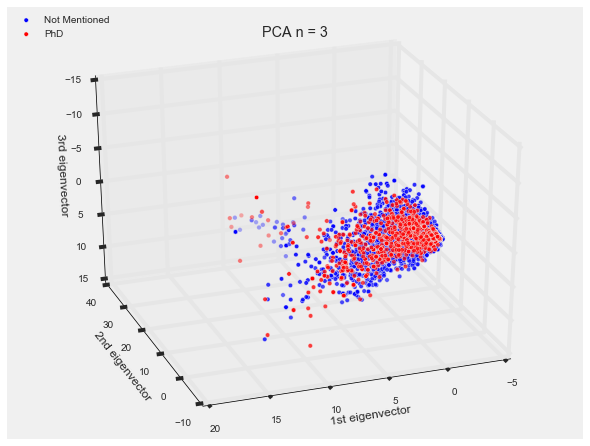

In [40]:
draw_3d_pca(P0, P1, PCA(n_components=3), phd_map)

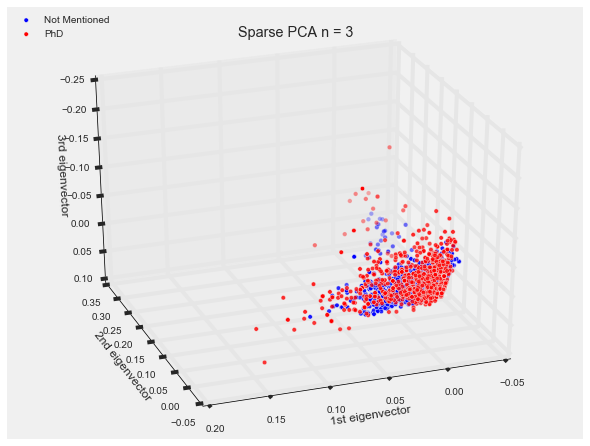

In [41]:
draw_3d_pca(P0, P1, SparsePCA(n_components=3), phd_map, 'Sparse PCA n = 3')

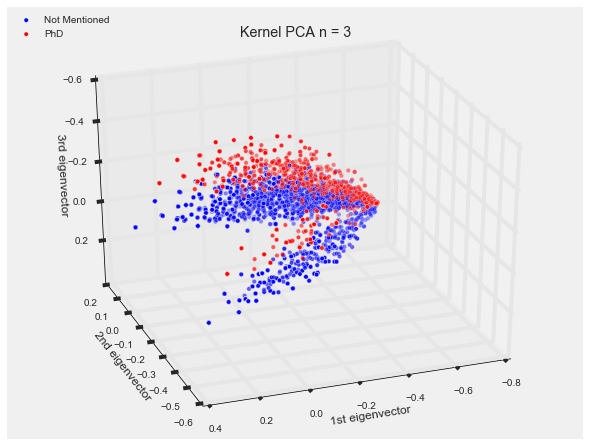

In [42]:
# kernel pca takes longer time
draw_3d_pca(P0, P1, KernelPCA(n_components=3, kernel='rbf'), phd_map, 'Kernel PCA n = 3')

In [43]:
# bay area lab

Bay = JD.Location.apply(lambda c: 1 if (c in ['San Francisco', 'San Jose']) else 0)

B1 = X.ix[JD[Bay == 1].index]
B0 = X.ix[JD[Bay == 0].index]
bay_map = {1: 'Bay Area', 0: 'Not Bay'}
print B1.shape, B0.shape

(1873, 58) (7806, 58)


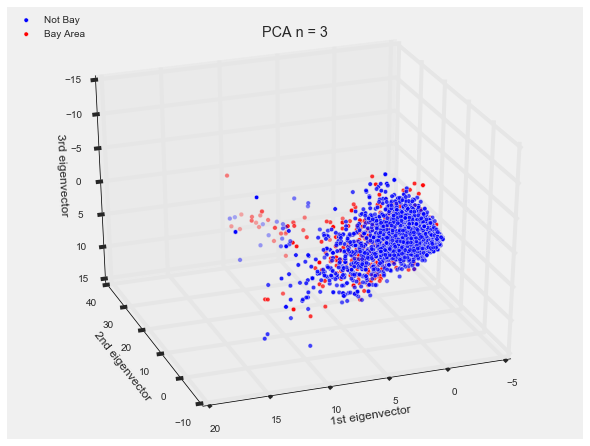

In [44]:
draw_3d_pca(B0, B1, PCA(n_components=3), bay_map)

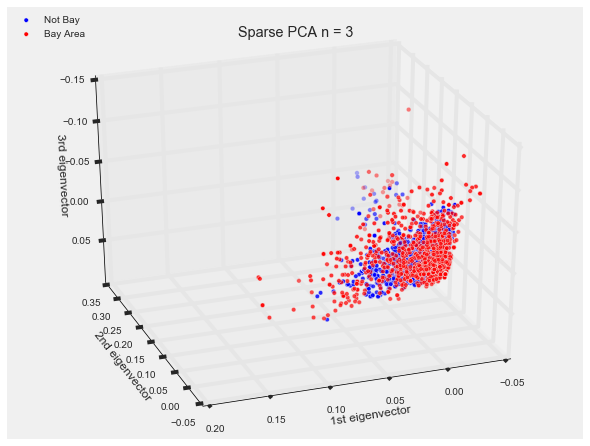

In [45]:
draw_3d_pca(B0, B1, SparsePCA(n_components=3), bay_map,'Sparse PCA n = 3')

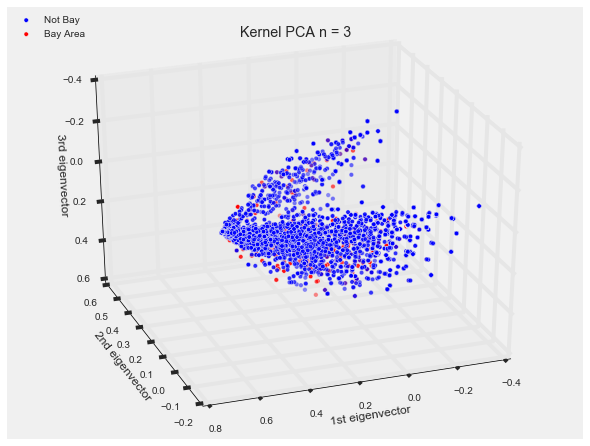

In [46]:
draw_3d_pca(B0, B1, KernelPCA(n_components=3, kernel='rbf'), bay_map,'Kernel PCA n = 3')

In [47]:
def FLAG(input_str):
    flag = 0
    for s in ['facebook', 'linkedin', 'amazon', 'google']:
        if s in input_str.lower():
            flag = 1
    return flag

Flag = JD.Company.apply(FLAG)

F1 = X.ix[JD[Flag == 1].index]
F0 = X.ix[JD[Flag == 0].index]
Flag_map = {1: 'FLAG', 0: 'Non-FLAG'}
print F1.shape, F0.shape

(405, 58) (9274, 58)


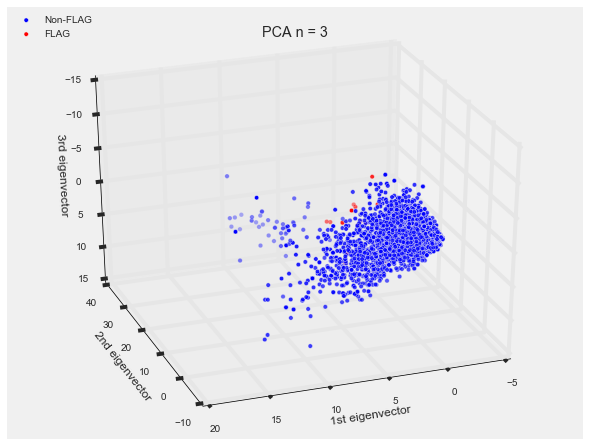

In [48]:
draw_3d_pca(F0, F1, PCA(n_components=3), Flag_map)

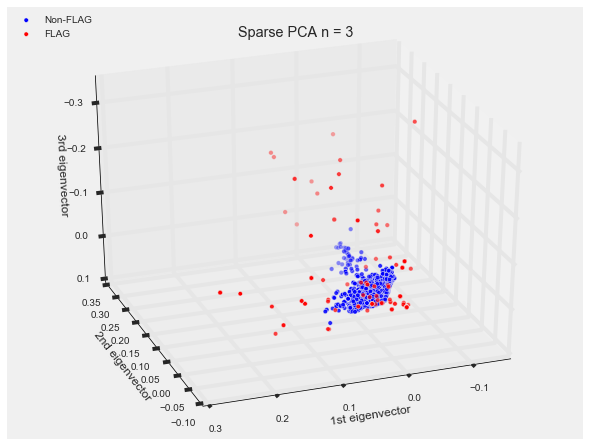

In [49]:
draw_3d_pca(F0, F1, SparsePCA(n_components=3), Flag_map, 'Sparse PCA n = 3')

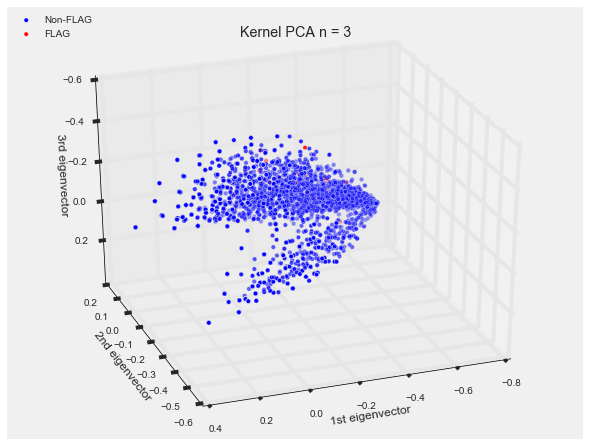

In [50]:
draw_3d_pca(F0, F1, KernelPCA(n_components=3, kernel='rbf'), Flag_map,'Kernel PCA n = 3')

In [51]:
# look into FLAG's outlier

spca = SparsePCA(n_components=3)
spca.fit(pd.concat([F0, F1]))
Z1 = spca.transform(F1)
print F1.shape, Z1.shape

(405, 58) (405L, 3L)


In [56]:
# print out these URLs!
flag_ix = []
for F_ix, z0, z2 in zip(F1.index, Z1[:,0], Z1[:,2]):
    
    if z2 < 0 or z0 > 0.1:
        flag_ix.append(F_ix)

print len(flag_ix)

FLAG_outlier = JD.ix[flag_ix,['Company','Title','url']]
for c, t, u in zip(FLAG_outlier.Company, FLAG_outlier.Title, FLAG_outlier.url):
    print c, ":", t, '\n', u

80
Google : Data Scientist / Quantitative Analyst, Engineering 
http://www.indeed.com/rc/clk?jk=1c81b34b23854260&fccid=a5b4499d9e91a5c6
Google : Machine Learning Deployment Engineer, Professional Services, Google Cloud 
http://www.indeed.com/rc/clk?jk=2b6c772e8386f21b&fccid=a5b4499d9e91a5c6
Google : Quantitative Analyst Intern, Summer 2017 
http://www.indeed.com/rc/clk?jk=5a09bb4235b160f7&fccid=a5b4499d9e91a5c6
Facebook : Data Scientist, Analytics 
http://www.indeed.com/rc/clk?jk=8f474fd2bcabbff9&fccid=1639254ea84748b5
Google : Machine Learning Deployment Engineer, Professional Services, Google Cloud 
http://www.indeed.com/rc/clk?jk=123a06bb156c1ef6&fccid=a5b4499d9e91a5c6
Google : Cloud Instructor (Big Data, Machine Learning), Google Cloud Platform 
http://www.indeed.com/rc/clk?jk=1e823b0b12229808&fccid=a5b4499d9e91a5c6
Google : Research Scientist, Machine Learning and Intelligence 
http://www.indeed.com/rc/clk?jk=38f86cfa4cc2a977&fccid=a5b4499d9e91a5c6
Google : Developer Programs Engi

In [57]:
from sklearn.linear_model import LogisticRegressionCV

In [58]:
# what skill helps you get FLAG offer?

Flag = JD.Company.apply(FLAG)

F1 = X.ix[JD[Flag == 1].index]
F0 = X.ix[JD[Flag == 0].index]
print F1.shape, F0.shape

(405, 58) (9274, 58)


In [59]:
# draw sample from non-FLAG firms, the results will differ each time

sample_ix = np.random.choice(F0.index.tolist(), size=F1.shape[0], replace=False)
sample_F0 = F0.ix[sample_ix,:]
all_F = pd.concat([sample_F0, F1])
all_target = np.hstack([np.zeros(F1.shape[0]), np.ones(F1.shape[0])])
print all_F.shape, all_target.shape
print sample_F0.shape, F1.shape

(810, 58) (810L,)
(405, 58) (405, 58)


In [60]:
L_model = LogisticRegressionCV(cv=10,penalty='l1',solver='liblinear')
L_model.fit(all_F, all_target)
L_model.score(all_F, all_target)

0.76790123456790127

In [61]:
coef = pd.DataFrame({'Coeffient':np.ravel(L_model.coef_)}, index=all_F.columns.tolist()).sort_values(by='Coeffient')
coef

,Coeffient
Spark,-1.371784
Excel,-1.129823
Torch,-0.890988
C,-0.637469
JavaScript,-0.519933
R,-0.480520
Git,-0.478011
SVM,-0.444955
D3.js,-0.423468
NoSQL,-0.409300


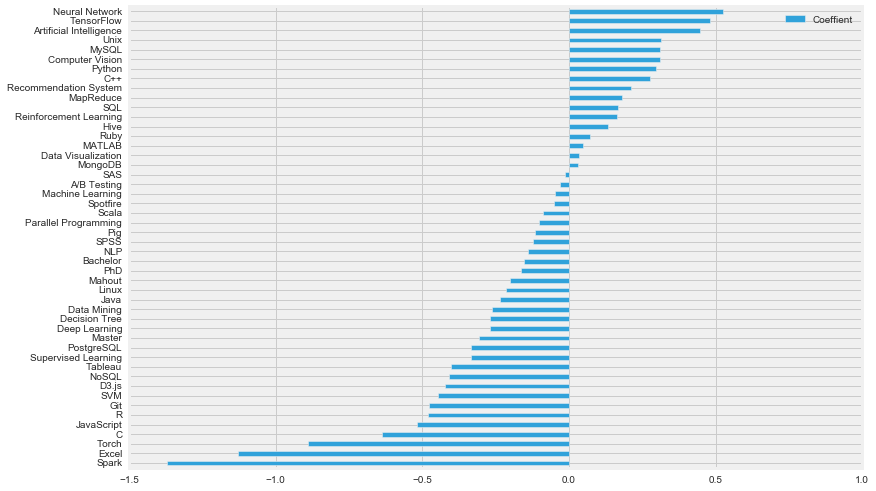

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
coef[coef['Coeffient'].abs() > 0.01].plot(kind='barh', ax=ax)